In [41]:
import librosa
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import soundfile;

# Load the audio file
raw_sample_folder = "raw-samples"
output_folder = "samples"

def get_audio_file_path(folder, language, speaker, digit, trial):
    return os.path.join(folder,f"lang-{language}_speaker-{speaker}_digit-{digit}_trial-{trial}.wav")
def get_parts_from_file_path(file_path):
    file_name = os.path.basename(file_path)
    parts = file_name.split("_")
    language = parts[0].split("-")[1]
    speaker = parts[1].split("-")[1]
    digit = parts[2].split("-")[1]
    trial = parts[3].split("-")[1].split(".")[0]
    return language, speaker, digit, trial
def write_trial_to_file(language, speaker, digit, trial, signal, sample_rate):
    soundfile.write(get_audio_file_path(output_folder, language, speaker, digit, trial), signal, sample_rate)
    
samples = glob.glob(os.path.join(raw_sample_folder,"*"))

In [42]:
for sample in samples:
    signal, sample_rate = librosa.load(
        sample, sr=librosa.get_samplerate(sample))

    relevant_sample_points = np.where(signal <= -0.06)[0]
    diffs_between_sample_points = np.diff(relevant_sample_points)
    relevant_diffs_indexes = np.where(diffs_between_sample_points > 40000)
    language, speaker, digit, trial = get_parts_from_file_path(sample)
    print(f"Found {len(relevant_diffs_indexes[0])} relevant diffs in {sample}")
    for i in range(len(relevant_diffs_indexes[0])):
        start = max(relevant_sample_points[relevant_diffs_indexes[0][i]] - sample_rate, 0)
        end = min(relevant_sample_points[relevant_diffs_indexes[0][i]] + sample_rate, len(signal))
        print(f"Writing segment {start,end} {get_audio_file_path(output_folder, language, speaker, digit, i+1)}")
        write_trial_to_file(language, speaker, digit, i+1, signal[start:end], sample_rate)
        

Found 30 relevant diffs in raw-samples/lang-german_speaker-12_digit-0_trial-0.WAV
Writing segment (20489, 116489) samples/lang-german_speaker-12_digit-0_trial-1.wav
Writing segment (115317, 211317) samples/lang-german_speaker-12_digit-0_trial-2.wav
Writing segment (212212, 308212) samples/lang-german_speaker-12_digit-0_trial-3.wav
Writing segment (306417, 402417) samples/lang-german_speaker-12_digit-0_trial-4.wav
Writing segment (408782, 504782) samples/lang-german_speaker-12_digit-0_trial-5.wav
Writing segment (500368, 596368) samples/lang-german_speaker-12_digit-0_trial-6.wav
Writing segment (601310, 697310) samples/lang-german_speaker-12_digit-0_trial-7.wav
Writing segment (696421, 792421) samples/lang-german_speaker-12_digit-0_trial-8.wav
Writing segment (789002, 885002) samples/lang-german_speaker-12_digit-0_trial-9.wav
Writing segment (888425, 984425) samples/lang-german_speaker-12_digit-0_trial-10.wav
Writing segment (1018672, 1114672) samples/lang-german_speaker-12_digit-0_tria

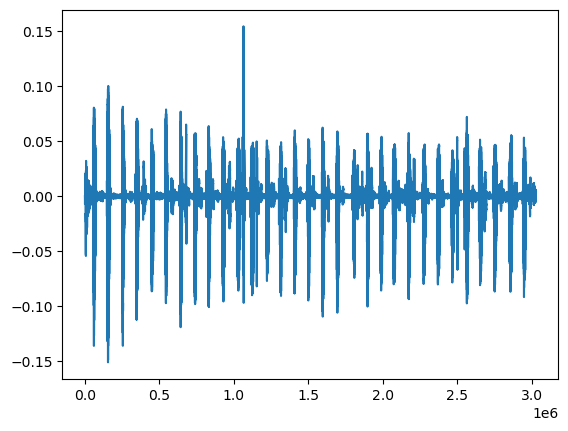

In [3]:
plt.plot(signal)